<a href="https://colab.research.google.com/github/AllanKDeveloper/dio-face-recognization/blob/main/face_reco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install face_recognition opencv-python bing-image-downloader pillow

In [14]:
from bing_image_downloader import downloader
import os
import face_recognition
import cv2
from google.colab.patches import cv2_imshow

# Step 1: Download Images for Characters
def download_images_bing(query, limit=5):
    downloader.download(query, limit=limit, output_dir="supernatural_images", adult_filter_off=True, force_replace=False, timeout=60)

# Download images for characters
characters = ["Dean Winchester", "Sam Winchester", "Castiel"]
for character in characters:
    print(f"Downloading images for {character}...")
    download_images_bing(character, limit=5)

[%] Downloading Images to /content/supernatural_images/Dean Winchester Supernatural


[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://oyster.ignimgs.com/mediawiki/apis.ign.com/supernatural/7/78/Dean_Winchester.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.wallpapergeeks.com/wp-content/uploads/2015/04/supernatural-dean-winchester-wallpaper.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://getwallpapers.com/wallpaper/full/f/6/b/267342.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://vignette.wikia.nocookie.net/allthingsinsanesupernatural/images/b/b0/Dean-Winchester-dean-winchester-6436758-828-1200.jpg/revision/latest?cb=20120417210540
[%] File Downloaded !

[%] Downloading Image #5 from https://images-wixmp-ed30a86b8c4ca887773594c2.wixmp.com/f/d780589d-71a7-4c04-b505-9a6f6add0885/d5dool1-b44a8b3e-ccfc-478f-8af7-480bb477598d.png?token=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJzdWIiOiJ1cm46YXB

In [20]:
# Step 2: Process Downloaded Images for Face Recognition
image_dir = "/content/supernatural_images"
known_faces = []
known_names = []

# Encode faces for each character
for character in os.listdir(image_dir):
    character_folder = os.path.join(image_dir, character)
    if os.path.isdir(character_folder):
        for image_name in os.listdir(character_folder):
            image_path = os.path.join(character_folder, image_name)
            try:
                image = face_recognition.load_image_file(image_path)
                encodings = face_recognition.face_encodings(image)
                if encodings:
                    encoding = encodings[0]
                    known_faces.append(encoding)
                    known_names.append(character)
                else:
                    print(f"No face found in {image_path}")
            except Exception as e:
                print(f"Could not process {image_path}: {e}")

print(f"Processed {len(known_faces)} faces from downloaded images.")


Processed 15 faces from downloaded images.


In [23]:
# Step 3: Label Faces in New Images
def label_faces(image_path):
    import cv2
    import face_recognition

    # Load the image and convert it to RGB
    image = cv2.imread(image_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect faces in the image
    face_locations = face_recognition.face_locations(rgb_image)
    face_encodings = face_recognition.face_encodings(rgb_image, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        matches = face_recognition.compare_faces(known_faces, face_encoding)
        name = "Unknown"

        if True in matches:
            match_index = matches.index(True)
            name = known_names[match_index]

        # Draw a rectangle around the face and label it
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.2, (255, 0, 0), 1)

    # Display the labeled image using cv2_imshow
    cv2_imshow(image)

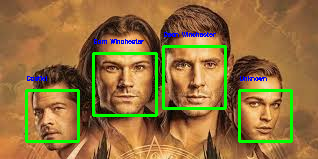

In [24]:
# Test with an example image
test_image_path = "/content/supernatural_images/test.jpg"
label_faces(test_image_path)